<a href="https://colab.research.google.com/github/opan27/MATKUL-Analitik-dan-Visualisasi-Data/blob/main/pertemuan9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect db
import sqlite3
import pandas as pd

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()


In [ ]:
# membuat table

# Tabel Buku
cursor.execute('''
CREATE TABLE buku (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    judul TEXT NOT NULL,
    penulis TEXT NOT NULL,
    tahun INTEGER NOT NULL
)
''')

# Tabel Anggota
cursor.execute('''
CREATE TABLE anggota (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    nama TEXT NOT NULL,
    email TEXT NOT NULL
)
''')

# Tabel Peminjaman
cursor.execute('''
CREATE TABLE peminjaman (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    id_anggota INTEGER,
    id_buku INTEGER,
    tgl_pinjam TEXT NOT NULL,
    tgl_kembali TEXT,
    FOREIGN KEY (id_anggota) REFERENCES anggota(id),
    FOREIGN KEY (id_buku) REFERENCES buku(id)
)
''')


In [ ]:
#menambahkan data
# Tambah 5 buku
cursor.executemany(
    "INSERT INTO buku (judul, penulis, tahun) VALUES (?, ?, ?)",
    [
        ("Algoritma & Pemrograman", "D. Kuswanto", 2019),
        ("Data Science Handbook", "J. VanderPlas", 2017),
        ("Pengantar Statistika", "S. Walpole", 2015),
        ("Kecerdasan Buatan", "E. Rich", 2010),
        ("Basis Data Relasional", "C.J. Date", 2016)
    ]
)

# Tambah 3 anggota
cursor.executemany(
    "INSERT INTO anggota (nama, email) VALUES (?, ?)",
    [
        ("Taufan", "taufan@gmail.com"),
        ("Bagas", "bagas@yahoo.com"),
        ("Yurif", "yurif@hotmail.com")
    ]
)
conn.commit()


In [ ]:
# Tambahkan 4 transaksi
cursor.executemany(
    "INSERT INTO peminjaman (id_anggota, id_buku, tgl_pinjam, tgl_kembali) VALUES (?, ?, ?, ?)",
    [
        (1, 2, "2025-11-01", "2025-11-04"),
        (2, 3, "2025-11-02", "2025-11-08"),
        (2, 4, "2025-11-03", None),
        (3, 1, "2025-11-04", "2025-11-06")
    ]
)
conn.commit()


In [ ]:
query = """
SELECT p.id, a.nama, b.judul, p.tgl_pinjam, p.tgl_kembali
FROM peminjaman p
JOIN anggota a ON p.id_anggota = a.id
JOIN buku b ON p.id_buku = b.id
ORDER BY p.id
"""
df_peminjaman = pd.read_sql_query(query, conn)
df_peminjaman


,id,nama,judul,tgl_pinjam,tgl_kembali
0,1,Taufan,Data Science Handbook,2025-11-01,2025-11-04
1,2,Bagas,Pengantar Statistika,2025-11-02,2025-11-08
2,3,Bagas,Kecerdasan Buatan,2025-11-03,None
3,4,Yurif,Algoritma & Pemrograman,2025-11-04,2025-11-06


In [ ]:
query = """
SELECT a.nama, COUNT(p.id) AS jumlah_dipinjam
FROM peminjaman p
JOIN anggota a ON p.id_anggota = a.id
GROUP BY a.id
"""
df_jumlah = pd.read_sql_query(query, conn)
df_jumlah


,nama,jumlah_dipinjam
0,Taufan,1
1,Bagas,2
2,Yurif,1


In [ ]:
import pandas as pd

query = """
SELECT p.id, a.nama, b.judul, p.tgl_pinjam, p.tgl_kembali
FROM peminjaman p
JOIN anggota a ON p.id_anggota = a.id
JOIN buku b ON p.id_buku = b.id
ORDER BY p.id
"""
df_peminjaman = pd.read_sql_query(query, conn)
df_peminjaman


,id,nama,judul,tgl_pinjam,tgl_kembali
0,1,Taufan,Data Science Handbook,2025-11-01,2025-11-04
1,2,Bagas,Pengantar Statistika,2025-11-02,2025-11-08
2,3,Bagas,Kecerdasan Buatan,2025-11-03,None
3,4,Yurif,Algoritma & Pemrograman,2025-11-04,2025-11-06


In [ ]:
from datetime import datetime

def get_duration(row):
    if row['tgl_kembali']:
        return (datetime.strptime(row['tgl_kembali'], "%Y-%m-%d") - datetime.strptime(row['tgl_pinjam'], "%Y-%m-%d")).days
    else:
        return None

df_peminjaman['durasi_hari'] = df_peminjaman.apply(get_duration, axis=1)
print(df_peminjaman)


   id    nama                    judul  tgl_pinjam tgl_kembali  durasi_hari
0   1  Taufan    Data Science Handbook  2025-11-01  2025-11-04          3.0
1   2   Bagas     Pengantar Statistika  2025-11-02  2025-11-08          6.0
2   3   Bagas        Kecerdasan Buatan  2025-11-03        None          NaN
3   4   Yurif  Algoritma & Pemrograman  2025-11-04  2025-11-06          2.0


In [ ]:
mean_duration = df_peminjaman['durasi_hari'].mean()
print("Rata-rata durasi pinjam:", mean_duration)

print(df_peminjaman['nama'].value_counts())


Rata-rata durasi pinjam: 3.6666666666666665
nama
Bagas     2
Taufan    1
Yurif     1
Name: count, dtype: int64


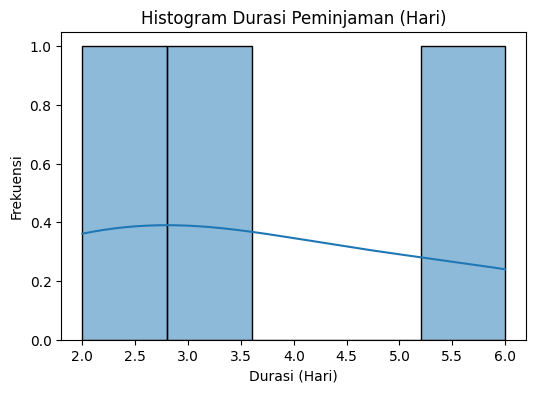

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

durasi_aktif = df_peminjaman['durasi_hari'].dropna()

plt.figure(figsize=(6,4))
sns.histplot(durasi_aktif, bins=5, kde=True)
plt.title("Histogram Durasi Peminjaman (Hari)")
plt.xlabel("Durasi (Hari)")
plt.ylabel("Frekuensi")
plt.show()


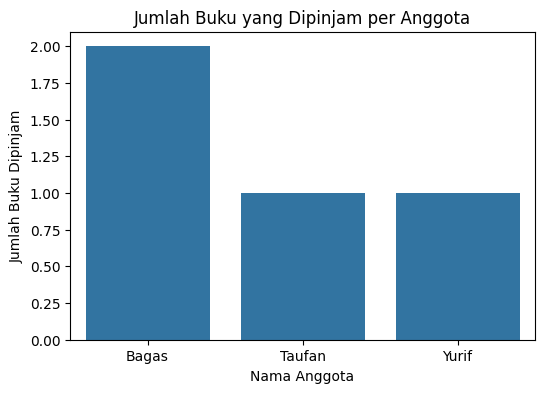

In [ ]:
pinjaman_per_anggota = df_peminjaman['nama'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=pinjaman_per_anggota.index, y=pinjaman_per_anggota.values)
plt.title("Jumlah Buku yang Dipinjam per Anggota")
plt.xlabel("Nama Anggota")
plt.ylabel("Jumlah Buku Dipinjam")
plt.show()
